# Abrindo Modelos Black Blox

<div>
<img src="imgs/andre-barbosa.png" width="200"/>
</div>

Esse sou eu :)

- DS @QuintoAndar
- Mestrando @IME-USP
- [https://www.linkedin.com/in/barbosaandre](https://www.linkedin.com/in/barbosaandre) - Só me avisa de onde você veio :)
- [abarbosa94.github.io/personal_blog](https://abarbosa94.github.io/personal_blog)

## Agenda

- Caixa de Vidro vs Caixa Preta
- Destrinchando Caixas de Vidro
- Usando uma API comum
- Entendendo alguns Modelos Caixa Preta
- Abrindo as caixas pretas
- SHAP

# Disclaimer

Quando falamos de _Abrir Modelos_, não necessariamente estamos _destrinchando_ os modelos em si, mas tentamos encontrar uma explicação para as nossas **predições** e é exatamente isso que veremos na aula de hoje :)

## Caixa de Vidro vs Caixa Preta


<div>
<img src="imgs/glass-vs-black-box.png" width="500"/>
</div>

[source](https://www.slideshare.net/YangLiHectorYee/hector-yeesparksummit2015)


Como é possível ver pelas imagens, as classes de modelos de Machine Learning dividem-se em duas: modelos de **caixa de vidro**, em que as interpretrações/predições são claras e diretas e modelos **caixa preta**, em que os resultados não são facilmente interpretáveis por um humano.

## Exercício !

![](imgs/exercise-dog.gif)

Em grupos, durantes 5 minutos, discutam entre vocês com base em **todos** os modelos estudados, quais são caixa de vidro e quais são caixa preta.

![](https://media.giphy.com/media/j5ElOMw40c0H6uvBtf/giphy.gif)

Digam-me o que vocês acharam para, em seguida, começarmos com as nossas investigações :)

Antes de começarmos, vamos ver o dataset que vamos trabalhar por toda a aula de hoje! :)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
pd.options.display.max_rows = 60
pd.options.display.max_columns = 100
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_csv("dataset/house_dataset.csv", index_col=0)

[Descricao do Dataset](dataset/data_description.txt)

In [3]:
dataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [4]:
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

Por questões de simplificação, iremos trabalhar _apenas_ com as variáveis numéricas :)

In [5]:
numerical_features = [
    "MSSubClass",
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
]
label = "SalePrice"
dataset[numerical_features].isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
dtype: int64

<AxesSubplot:>

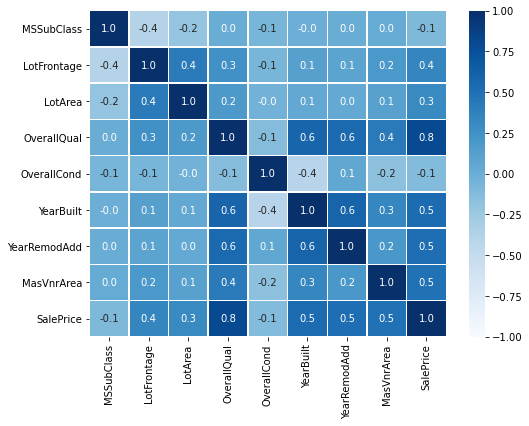

In [6]:
df_corr = dataset[numerical_features + [label]].dropna().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_corr,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cmap="Blues",
    center=0,
    vmax=1.0,
    vmin=-1.0,
)

Vemos uma variável com forte correlação **linear** entre as variáveis. Isso é um indicativo de que essa variável talvez venha a ser importante

# Destrinchando alguns Modelos Caixa de Vidro

## Regressão Linear

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import r2_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset[numerical_features], dataset[label]
)

In [9]:
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
sc = StandardScaler()
linear_model = Ridge(alpha=0.3)

In [10]:
steps = [
    ("input_median", imp_median),
    ("standard_scaler", sc),
    ("linear_regression", linear_model),
]

In [2]:
# Fazer sem o Pipeline

In [12]:
r2_score(y_test, pipeline.predict(X_test))

0.6997619217177528

In [13]:
results = cross_validate(
    pipeline,
    X=dataset[numerical_features],
    y=dataset[label],
    cv=10,
    scoring=["r2", "neg_root_mean_squared_error"],
)
results['test_r2'].mean()

0.7014661217822405

In [14]:
trained_model = pipeline.named_steps["linear_regression"]
coefs = pd.DataFrame(
    trained_model.coef_, columns=["Coefficients"], index=numerical_features
)

coefs

Coefficients
MSSubClass    -6442.028166
LotFrontage    4086.535389
LotArea       11766.015527
OverallQual   49396.998752
OverallCond    -231.722340
YearBuilt      3260.681960
YearRemodAdd   8584.378938
MasVnrArea    13305.141285

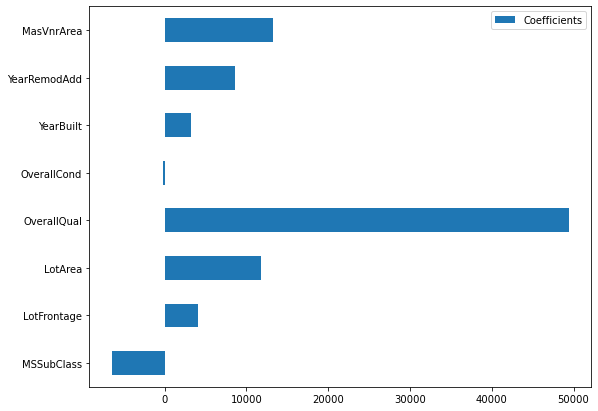

In [15]:
_ = coefs.plot(kind="barh", figsize=(9, 7))

Dado que vocês já aprenderam, discutam em grupo como a gente pode interpretar esses coeficientes? Eles fazem sentido?

A representação dos coeficientes permite ser prático para analisarmos a qualidade de predições. O aumento em $1$ unidade de _OverallQual_, resulta em um aumento em $\approx 33257.398124$ unidades de _SalePrice_. 

Relembrando do Dataset:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
 Então, faz sentido (além de já termos percebido isso no nosso "EDA" inicial)
 
 :)

Em contra partida, o aumento em $1$ unidade de _MSSubClass_ reflete em um **decrécimo** de $\approx 3291$ unidades de _SalePrice_

Relembrando do Dataset:

MSSubClass: Identifies the type of dwelling (_habitação/moradia_) involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

As variáveis aqui, apesar de terem números, são variáveis categóricas sem nenhum sentido direto. Talvez isso é um indício de que poderíamos transformá-las em OHE

O gráfico acima mostra a dependência entre uma `variável específica` e o `target` quando todas as outras variáveis estão constantes (**conditional dependence**)

## Decision Tree

Outro modelo de _glass blox_ clássico são as árvores de decisão

In [16]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

In [17]:
dt = DecisionTreeRegressor(random_state=42)

In [18]:
steps = [
    ("input_median", imp_median),
    ("decision_tree", dt),
]

In [19]:
pipeline_tree = Pipeline(steps)
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('input_median', SimpleImputer(strategy='median')),
                ('decision_tree', DecisionTreeRegressor(random_state=42))])

In [20]:
r2_score(y_test, pipeline_tree.predict(X_test))

0.5820278122807336

In [21]:
results = cross_validate(
    pipeline_tree,
    X=dataset[numerical_features],
    y=dataset[label],
    cv=10,
    scoring=["r2", "neg_root_mean_squared_error"],
)
results['test_r2'].mean()

0.6092389205384985

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, dpi=2000)
plot_tree(pipeline_tree.named_steps["decision_tree"], feature_names=numerical_features)
fig.savefig("decision_tree.png")

wtf

![](https://media.giphy.com/media/UTBMdkrDUz2GWFofDe/giphy.gif)

O conceito de "interpretável", aqui é bem pra inglês ver uma vez que qualquer árvore de com mais de 5 níveis de profundidade fica meio complicado de vizualizar :(

# Interpretando por meio de uma API comum

Para facilitar algumas analises

In [23]:
import eli5

In [24]:
eli5.show_weights(pipeline.named_steps["linear_regression"], 
                  feature_names=numerical_features)

In [25]:
eli5.show_weights(pipeline_tree.named_steps["decision_tree"],
                  feature_names=numerical_features)

## Podemos fazer analises de uma predição específica

In [26]:
pipeline.predict(X_test.iloc[0:1])

array([107517.2724495])

In [27]:
transform_data_point = pipeline.named_steps["input_median"].transform(
    X_test.iloc[0:1]
)[0]
transform_data_point = pipeline.named_steps["standard_scaler"].transform(
    transform_data_point.reshape(1, -1)
)[0]

In [28]:
eli5.show_prediction(
    pipeline.named_steps["linear_regression"],
    transform_data_point,
    feature_names=numerical_features,
    show_feature_values=True,
)

In [29]:
eli5.show_prediction(
    pipeline_tree.named_steps["decision_tree"],
    X_test.iloc[0],
    show_feature_values=True,
)

# Entendendo alguns Modelos Caixa Preta

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

In [31]:
steps = [
    ("input_median", imp_median),
    ("random_forest", rf),
]

In [32]:
pipeline_rf = Pipeline(steps)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('input_median', SimpleImputer(strategy='median')),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [33]:
r2_score(y_test, pipeline_rf.predict(X_test))

0.7604442996429899

In [34]:
results = cross_validate(
    pipeline_rf,
    X=dataset[numerical_features],
    y=dataset[label],
    cv=10,
    scoring=["r2", "neg_root_mean_squared_error"],
)
results['test_r2'].mean()

0.7667453745084909

Tivemos um resultado melhor que a Regressão Linear !

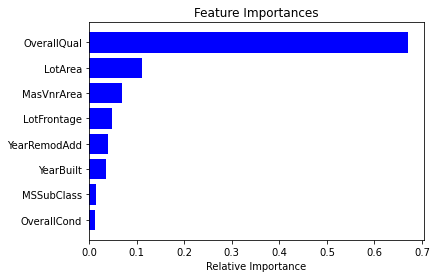

In [35]:
importances = pipeline_rf.named_steps["random_forest"].feature_importances_
indices = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), [numerical_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [36]:
eli5.show_weights(pipeline_rf.named_steps["random_forest"], feature_names=numerical_features)

In [37]:
eli5.show_prediction(
    pipeline_rf.named_steps["random_forest"],
    X_test.iloc[0],
    show_feature_values=True,
)

Mas o que isso quer dizer/representar? E no caso de Boosting?

A interpretação aqui acaba assumindo um valor mais "relativo" e, bem, existem modelos que não tem essa "analogia" tão fácil.


Isso nos, por muito tempo, pensar que o gráfico abaixo era verdade

![](imgs/ml-tradeoff.png)

Porém, veremos que isso é uma falácia (_nos dois casos_)

![](imgs/falacy.png)

# Abrindo as caixas pretas!


## Permutation Importance



>The idea is the following: feature importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.

> To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. Also, it shows what may be important within a dataset, not what is important within a concrete trained model.

> To avoid re-training the estimator we can remove a feature only from the test part of the dataset, and compute score without using this feature. It doesn’t work as-is, because estimators expect feature to be present. So instead of removing a feature we can replace it with random noise - feature column is still there, but it no longer contains useful information. This method works if noise is drawn from the same distribution as original feature values (as otherwise estimator may fail). The simplest way to get such noise is to shuffle values for a feature, i.e. use other examples’ feature values - this is how permutation importance is computed.

> The method is most suitable for computing feature importances when a number of columns (features) is not huge; it can be resource-intensive otherwise.

[source](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

In [38]:
from eli5.sklearn import PermutationImportance

transform_data = pipeline_rf.named_steps["input_median"].transform(X_test)

perm = PermutationImportance(pipeline_rf.named_steps["random_forest"]).fit(
    transform_data, y_test
)
eli5.show_weights(perm, feature_names=numerical_features)

In [39]:
eli5.show_weights(pipeline_rf.named_steps["random_forest"], feature_names=numerical_features)

Olhando por aqui, vemos que a relação de importância não foi a mesma, o que é iportante para as variáveis `LotFrontage` e `MasVnrArea`. Além disso, esse tipo de método é facilmente não escalável (e.g. e se tivessemos 1000 ou mais variáveis?)

## Meta modelos


![](imgs/metamodel.jpeg)

E se ao invés de tratarmos os modelos e tentarmos entender eles, tentássemos usar um _outro_ modelo para explicar o primeiro ?

No caso, esse outro modelo seria **linear** e, logo, poderíamos interpretar mais ou menos como estamos acostumados :)


Logo, um primeiro pensamento intuitivo seria aproximar as predições por uma regressão linear. Faz sentido, certo?

### LIME 

> An explanation is created by approximating the underlying model locally by an interpretable one. Interpretable models are e.g. linear models with strong regularisation, decision tree’s, etc. The interpretable models are trained on small perturbations of the original instance and should only provide a good local approximation. The ‘dataset’ is created by e.g. adding noise to continuous features, removing words or hiding parts of the image. By only approximating the black-box locally (in the neighborhood of the data sample) the task is significantly simplified.

[source](https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b)

In [42]:
import lime
import lime.lime_tabular

In [43]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=numerical_features,
    verbose=True,
    mode="regression",
    discretize_continuous=False
)

In [44]:
exp = explainer.explain_instance(
    X_test.iloc[0].values, pipeline_rf.named_steps["random_forest"].predict)

Intercept 186218.52024821215
Prediction_local [116993.32953783]
Right: 98086.01


In [45]:
exp.show_in_notebook(show_table=True)

Apesar de perfeito, existem alguns poréms/limitações, que são discutidas [aqui](https://towardsdatascience.com/understanding-model-predictions-with-lime-a582fdff3a3b), [aqui](kdnuggets.com/2019/12/interpretability-part-3-lime-shap.html) e [aqui](https://eli5.readthedocs.io/en/latest/blackbox/lime.html)


Dessas, podemos testacar as seguintes:

1. O LIME só permite explicações locais, não dando uma noção global das features
2. Ele é computacionalmente caro. Considere o mesmo caso levantado com o PermutationImportance
3. A "noção de vizinhança" para gerar as amostras é algo bem custoso e complicado de definir. A implementação do LIME faz amostras de uma distribuição Gaussiana, que assume que as variáveis são sempre independentes e, bem, sabemos que na prática isso nem sempre é verdade

Então beleza, aproximar por uma regressão linear parece problemática, uma vez que da uma visão só local e tem as suas devidas limitações. O que podemos, então, fazer?

### SHAP



Uma ideia para estimar valores vem do conceito de Teoria de Jogos Cooperativa, o SHAPley Value, que também é linear! :)

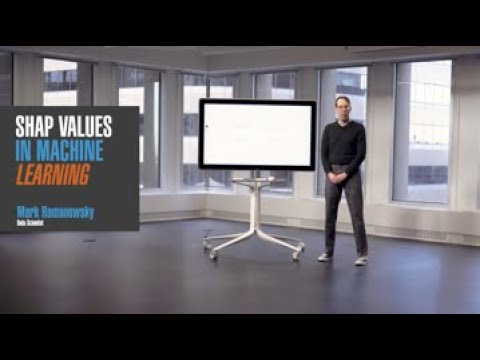

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='Tg8aPwPPJ9c',width=600,height=300)

Como vocês puderam ver, o trabalho em cima do SHAP é bastante simples. Além disso, ele é bastante interessante porquê ele **garante** duas propriedades super importantes para a definição de uma distribuição _justa_



![](imgs/shap-img-gt.jpeg)

Não vou entrar nos detalhes matemáticos dessas propriedades. Mas, para quem quiser, vocês podem ver mais sobre isso [aqui](https://www.youtube.com/watch?v=0yXtdkIL3Xk&t=328s) e [aqui](https://www.youtube.com/watch?v=0yXtdkIL3Xk&t=328s)


Inclusive, uma dessas propriedades é *vilodada* no caso do get_feature_importance dos modelos de Ensamble famosos. Para quem tiver curiosidade. Esse [texto](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27) pode ser legal!

Apesar de computar SHAPley Values ser extremamente caro (drawback), existem implementações _expecíficas_ para os casos de Árvore, _GLMs_ e alguns outros casos ! E isso foi o que fez a biblioteca ser utilizada, em produção, por várias empresas. tais como: *Creditas*; *Nubank*; *QuintoAndar*; *Google*

In [47]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [48]:
explainer = shap.TreeExplainer(pipeline_rf.named_steps["random_forest"])
shap_values = explainer.shap_values(X_test)

In [49]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [50]:
pipeline_rf.predict(X_test.iloc[0, :].values.reshape(1, -1))

array([98086.01])

In [51]:
X_test[['MasVnrArea', 'OverallQual', 'LotArea']].head(1)

MasVnrArea  OverallQual  LotArea
Id                                   
381         0.0            5     5000

In [52]:
1.802e+5, 1.169e+4

(180200.0, 11690.0)

A largura do retângulo apresenta o impacto das features. Basicamente vemos que o OverallQuality impacta/é justifica o **aumento** do preço do imóvel *em relação à base*, que é $\approx 180200.0$. Em contra partida o `LotArea` tem um impacto em reduzir o valor do output.


_Vocês conseguem pensar por quê?_

Uma ótima forma de debugar isso seria plotando _todo_ o dataset e tentando encontrar relação entre o _valor_ dessa feature vs o _impacto_ de uma feature relevante!

In [53]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_test)

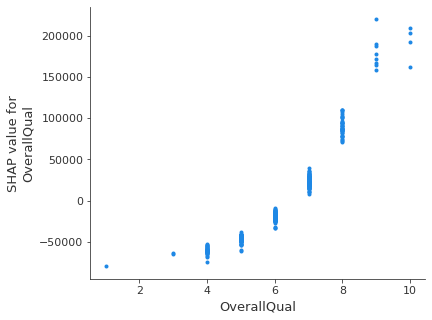

In [54]:
shap.dependence_plot("OverallQual", shap_values, X_test, interaction_index=None)

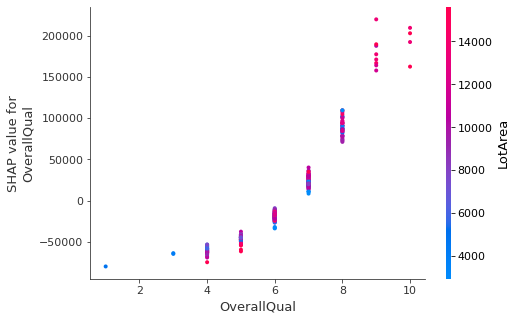

In [55]:
shap.dependence_plot("OverallQual", shap_values, X_test, interaction_index="LotArea")

E, por fim, podemos ter uma visão global das nossas predições

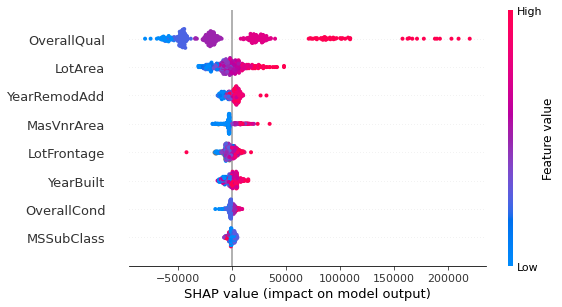

In [56]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

## Alguns Concerns

- O SHAP é extremamente _lento_ para qualquer caso que não seja árvore ou não seja modelo linear. É bom ter isso em mente

- **Não é um modelo causal**; Ele explica que features o modelo está considerando importantes e cabe a você avaliar se essa relação faz sentido (_debugging_ de modelo) e os actionables que são possíveis em cima disso.

Para quem se interessar, por volta dos 35 minutos desse [vídeo](https://www.youtube.com/watch?v=B-c8tIgchu0) ocorre uma discussão sobre isso e, com base nele, eu sugeriria esse vídeo [como introdução](https://www.youtube.com/watch?v=a7ZZCdm40Ik)

# Parabéns !

Agora vocês conseguem explicar modelos de ML de forma agnostica !

![](https://media.giphy.com/media/mbhseRYedlG5W/giphy.gif)